In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

import sys
sys.path.append("..")
import utils.utils as utils

In [3]:
def sentiment_balance(info, balance_dict):
    lang_name = info["lang_name"]
    file_path = info["file_path"]
    
    if lang_name not in ["Russian", "Japanese", "Turkish"]:    
        data = pd.read_csv(file_path, header=None)
        data.columns = ["sentiment", "review"]
        positive, total = balance_dict.get(lang_name, (0, 0))
        balance_dict.update({lang_name: (positive + data["sentiment"].sum(), total + data.shape[0])})
    
    return balance_dict

In [4]:
balance_dict = utils.run_through_data("../data/sentiment/", sentiment_balance, {})

../data/sentiment\ko\kosac-corpus-130808.csv is not a valid data path, skipping



In [5]:
sentiment_balance = pd.DataFrame([[lang, val[0], val[1]] for lang, val in balance_dict.items()],
                                 columns=["Language", "Positive", "Total"])
sentiment_balance = utils.order_table(sentiment_balance)
sentiment_balance["Ratio"] = sentiment_balance["Positive"] / sentiment_balance["Total"]

In [6]:
sentiment_balance

,Language,Positive,Total,Ratio
0,Bulgarian,6652,7923,0.839581
1,English,4963,9613,0.516280
2,Slovak,4574,5320,0.859774
3,Croatian,1658,2158,0.768304
4,Chinese,16548,27561,0.600414
5,Vietnamese,1700,3400,0.500000
6,Thai,4778,11600,0.411897
7,Finnish,1412,1951,0.723731
8,Basque,956,1129,0.846767
9,Korean,2691,4626,0.581712


In [51]:
sentiment_balance.to_excel("sentiment_balance.xlsx", index=False)

In [7]:
import matplotlib

In [8]:
sns.set()
sns.set_style("ticks")
plt.rc("xtick", labelsize=16)
plt.rc("ytick", labelsize=16)
plt.rc("axes", labelsize=16)
plt.rcParams["text.usetex"] = True
#plt.rc("font", **{"family": "serif", "serif": ["Computer Modern"]})

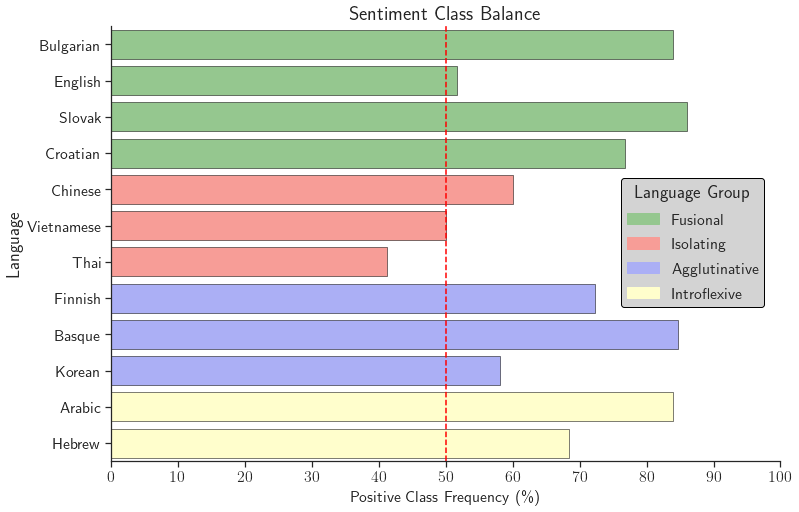

In [12]:
plt.figure(figsize=(12, 8))
colors = ["#95c78f"] * 4 + ["#f79d97"] * 3 + ["#abaff5"] * 3 + ["#fffecc"] * 2
ax = sns.barplot(x=sentiment_balance["Ratio"]*100, y=sentiment_balance["Language"], palette=colors, saturation=1,
                 ec="black", linewidth=0.5)
h, l = ax.get_legend_handles_labels()

ax.axvline(x=50, color="red", linestyle="--")
ax.set(xlabel="Positive Class Frequency (\%)", xticks=range(0, 101, 10))
ax.set_ylabel("Language", fontsize=18)
ax.set_title("Sentiment Class Balance", fontsize=20)
legend_patches = [Patch(color=color, label=label) for color, label in zip(["#95c78f", "#f79d97", "#abaff5", "#fffecc"],
                                                                          ["Fusional", "Isolating", "Agglutinative", 
                                                                           "Introflexive"])]
ax.legend(handles=legend_patches, title="Language Group", title_fontsize=18,
          loc="upper left", bbox_to_anchor=(0.75, 0.67), fontsize=16, facecolor="lightgrey", 
          framealpha=1, edgecolor="black", labelspacing=0.6)
sns.despine(ax=ax)
#ax.figure.savefig("plots/sentiment_balance.pdf", dpi=400)